In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [54]:

data = pd.read_excel("champagne_new.xlsx",index_col=0)
data.head()

,monthly_champange
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [2]:
data.index = pd.to_datetime(data.index)

In [3]:
data.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01',
               ...
               '1971-12-01', '1972-01-01', '1972-02-01', '1972-03-01',
               '1972-04-01', '1972-05-01', '1972-06-01', '1972-07-01',
               '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='Month', length=105, freq=None)

In [4]:
import matplotlib.pyplot as plt

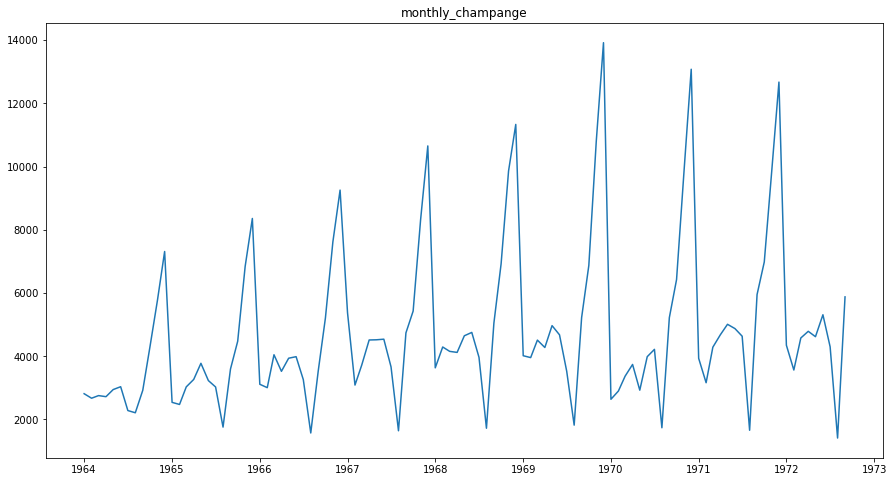

In [12]:
plt.figure(figsize=(15,8))
plt.plot(data)
plt.title("monthly_champange")
plt.show()

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='multiplicative')
result

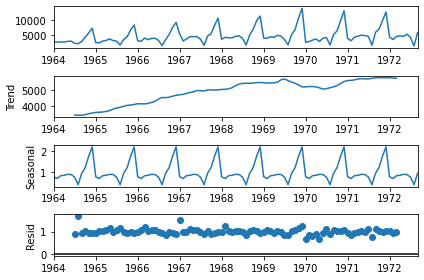

In [15]:
result.plot()
plt.show()

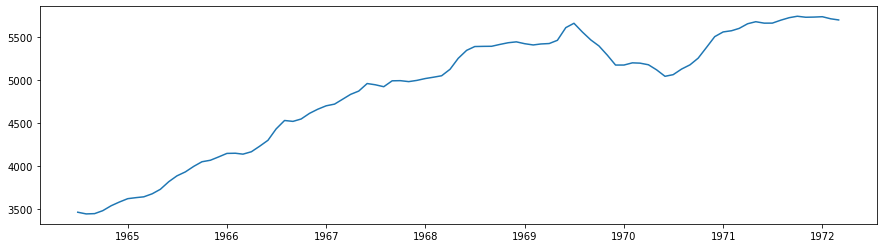

In [16]:
plt.figure(figsize=(15,4))
plt.plot(result.trend)
plt.show()

Lượng tiêu thụ champagen có xu hướng tăng dần theo từng năm

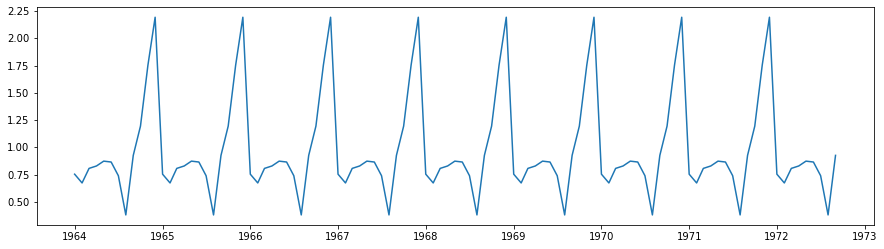

In [17]:
plt.figure(figsize=(15,4))
plt.plot(result.seasonal)
plt.show()

Có xu hướng mua champage nhiều vào cuối năm và ít vào giữa năm

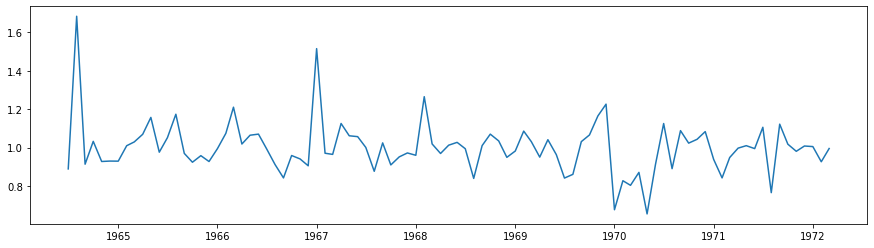

In [18]:
plt.figure(figsize=(15,4))
plt.plot(result.resid)
plt.show()

## ARIMIA

In [19]:
from pmdarima import auto_arima

In [20]:
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=12,
                           start_P=1, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1486.804, Time=0.75 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1524.662, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1507.071, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1490.517, Time=0.22 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1486.124, Time=0.35 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1488.819, Time=0.15 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1486.780, Time=0.75 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1485.190, Time=0.34 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1486.738, Time=0.72 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=inf, Time=1.72 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1490.003, Time=0.20 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1487.125, Time=0.42 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=1487.101, Time=0.60 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1516.612, Time=0.05 sec
 ARIMA(0,1,2)(1,1,0)[12]

In [21]:
print(stepwise_model.aic())

1485.190496719604


In [22]:
train = data.loc['1964-01-01':'1970-01-01'] # 1/1964 => 12/1969
test = data.loc['1970-01-01':] # 1/1970 -> het

In [23]:
test.head()

,monthly_champange
Month,
1970-01-01,2639
1970-02-01,2899
1970-03-01,3370
1970-04-01,3740
1970-05-01,2927


In [24]:
stepwise_model.fit(train)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [25]:
future_forecast = stepwise_model.predict(n_periods=len(test)) # so khoang thoi gian can du doan

In [26]:
future_forecast

array([ 4451.37595901,  4968.96096126,  4736.78705216,  5427.69277552,
        5139.28971055,  3987.68373078,  2282.1515664 ,  5682.65444696,
        7334.11964109, 11258.6113011 , 14360.88398694,  3109.79960809,
        4909.93481234,  5427.75146569,  5195.56561204,  5886.47849312,
        5598.05844148,  4446.43680231,  2740.92774198,  6141.43387422,
        7792.88948445, 11717.42371581, 14819.7665695 ,  3568.5126754 ,
        5368.72794697,  5886.54308508,  5654.35730957,  6345.27014383,
        6056.85020329,  4905.22866656,  3199.7194551 ,  6600.22556608,
        8251.68123899])

In [27]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
future_forecast

,Prediction
Month,
1970-01-01,4451.375959
1970-02-01,4968.960961
1970-03-01,4736.787052
1970-04-01,5427.692776
1970-05-01,5139.289711
1970-06-01,3987.683731
1970-07-01,2282.151566
1970-08-01,5682.654447
1970-09-01,7334.119641


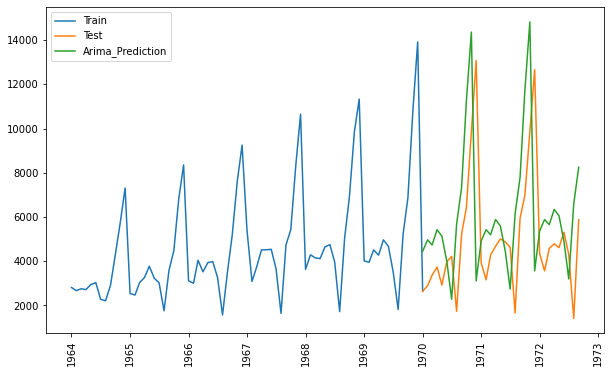

In [38]:
plt.figure(figsize=(10,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(future_forecast, label='Arima_Prediction')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

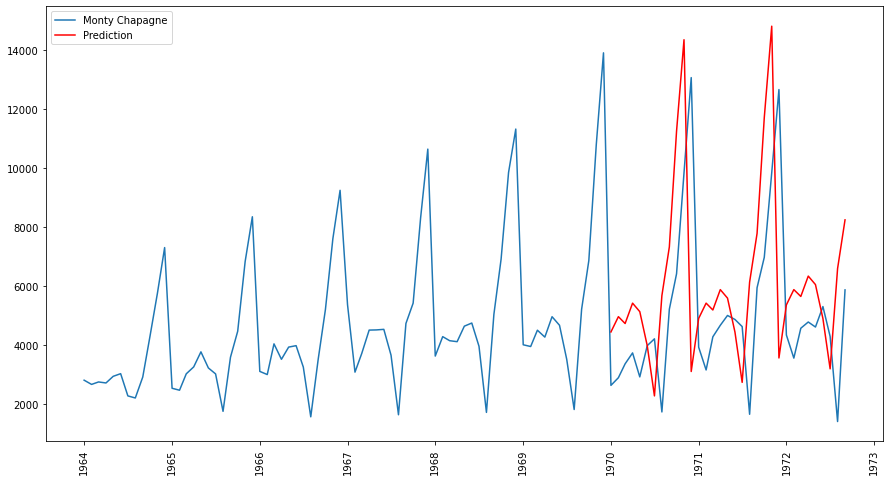

In [29]:
plt.figure(figsize=(15,8))
plt.plot(data, label='Monty Chapagne')
plt.plot(future_forecast, label='Prediction', color='red')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [31]:
mae = mean_absolute_error(test,future_forecast)
print(mae)


2616.583060969356


## Holt Winters

In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(train, seasonal='mul', 
                             seasonal_periods=12).fit()
pred = model.predict(start=test.index[0], 
                     end=test.index[-1])

C:\Users\asd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\asd\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


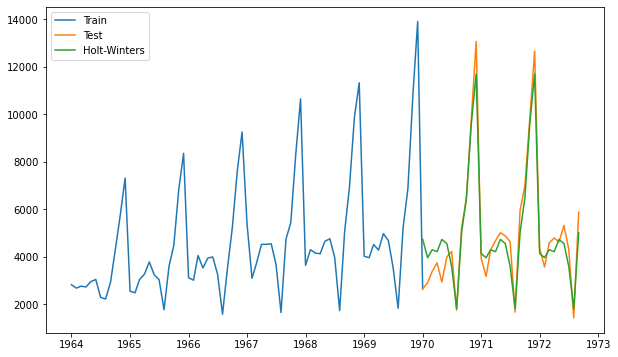

In [34]:
plt.figure(figsize=(10,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')

In [39]:
mae_Holt = mean_absolute_error(test,pred)
print(mae_Holt)

595.7381023644334


In [48]:
import datetime
s = datetime.datetime(1970, 10, 1)
e = datetime.datetime(1973, 6, 1)
pred_next_12_month = model.predict(start= s, end=e)
pred_next_12_month

1970-10-01     6479.873945
1970-11-01     9628.282017
1970-12-01    11703.272882
1971-01-01     4130.966736
1971-02-01     3954.464321
1971-03-01     4289.168411
1971-04-01     4209.950907
1971-05-01     4726.079961
1971-06-01     4550.051251
1971-07-01     3588.238077
1971-08-01     1806.845424
1971-09-01     5009.677537
1971-10-01     6479.873945
1971-11-01     9628.282017
1971-12-01    11703.272882
1972-01-01     4130.966736
1972-02-01     3954.464321
1972-03-01     4289.168411
1972-04-01     4209.950907
1972-05-01     4726.079961
1972-06-01     4550.051251
1972-07-01     3588.238077
1972-08-01     1806.845424
1972-09-01     5009.677537
1972-10-01     6479.873945
1972-11-01     9628.282017
1972-12-01    11703.272882
1973-01-01     4130.966736
1973-02-01     3954.464321
1973-03-01     4289.168411
1973-04-01     4209.950907
1973-05-01     4726.079961
1973-06-01     4550.051251
Freq: MS, dtype: float64

In [49]:
x = pd.Series(pred_next_12_month)
type(x)

pandas.core.series.Series

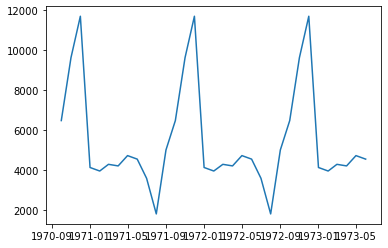

In [50]:
plt.plot(x.index, x.values)

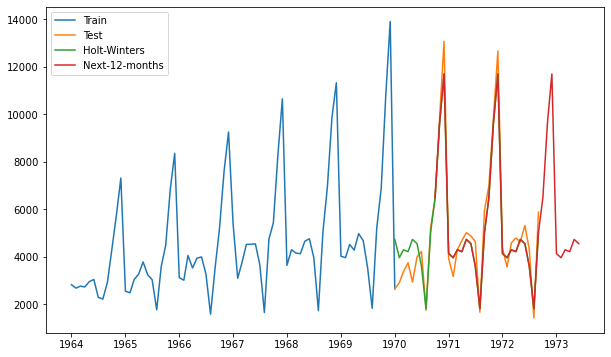

In [51]:
plt.figure(figsize=(10,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.plot(x.index, x.values, label='Next-12-months')
plt.legend(loc='best')

In [52]:
summary = {
            'Model_name': ['ARIMA', 'HoltWinter'],
            'MAE': [mae, mae_Holt],
            'Test_mean': [test.mean()[0], test.mean()[0]],
            '%': [mae/test.mean()[0]*100, mae_Holt/test.mean()[0]*100]
            }
summary = pd.DataFrame(summary)
summary

,Model_name,MAE,Test_mean,%
0,ARIMA,2616.583061,5047.30303,51.841212
1,HoltWinter,595.738102,5047.30303,11.803098


### Dùng Holt Winter cho kết quả tốt hơn vì MAE bé